In [458]:
from PIL import Image
import matplotlib.pyplot as plt
import time
import requests, re
from konlpy.tag import Okt
from collections import Counter
from bs4 import BeautifulSoup
from IPython.display import display,HTML
from wordcloud import WordCloud as WC
from nltk.tokenize import word_tokenize
import numpy as np

In [459]:
#BASE_URL = "https://gall.dcinside.com/mgallery/board/lists"
dc_id = "vr_games_xuq"
keyword = "뉴비"
url = f"https://gall.dcinside.com/mgallery/board/lists"
page_num = 4
_params = {'id': 'undecember',
           's_type' : 'search_subject_memo',
           'page' : {page_num},
           's_keyword' : {keyword}
          }

_headers = {
    "Connection" : "keep-alive",
    "Cache-Control" : "max-age=0",
    "sec-ch-ua-mobile" : "?0",
    "DNT" : "1",
    "Upgrade-Insecure-Requests" : "1",
    "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36",
    "Accept" : "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "Sec-Fetch-Site" : "none",
    "Sec-Fetch-Mode" : "navigate",
    "Sec-Fetch-User" : "?1",
    "Sec-Fetch-Dest" : "document",
    "Accept-Encoding" : "gzip, deflate, br",
    "Accept-Language" : "ko-KR,ko;q=0.9"
    }

In [460]:
okt = Okt()
c = Counter()
title = []

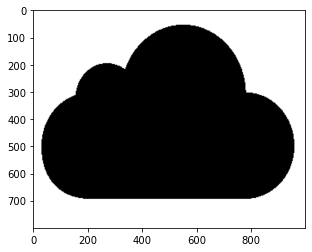

In [461]:
frame_img = Image.open('cloud_frame2.png')
plt.imshow(frame_img)

_mask = np.array(frame_img)


In [463]:
for i in range(1,16):
    #BASE_URL = "https://gall.dcinside.com/mgallery/board/lists"
    dc_id = "vr_games_xuq"
    keyword = "뉴비"
    url = f"https://gall.dcinside.com/mgallery/board/lists"
    page_num = i
    _params = {'id': 'undecember',
               's_type' : 'search_subject_memo',
               'page' : {page_num},
               's_keyword' : {keyword}
              }

    _headers = {
        "Connection" : "keep-alive",
        "Cache-Control" : "max-age=0",
        "sec-ch-ua-mobile" : "?0",
        "DNT" : "1",
        "Upgrade-Insecure-Requests" : "1",
        "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36",
        "Accept" : "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
        "Sec-Fetch-Site" : "none",
        "Sec-Fetch-Mode" : "navigate",
        "Sec-Fetch-User" : "?1",
        "Sec-Fetch-Dest" : "document",
        "Accept-Encoding" : "gzip, deflate, br",
        "Accept-Language" : "ko-KR,ko;q=0.9"
        }
    
    resp = requests.get(url, params=_params, headers=_headers)
    print(i)
    soup = BeautifulSoup(resp.content, 'html.parser')
    article_list = soup.select(".us-post")
    

    stop_word = ['질문','시발','때','뭐','집','랩']
    for element in article_list:
            title.append(element.select(".ub-word > a")[0].text)
            

    for item in title:
        word_tokens = word_tokenize(item)
        for token in word_tokens:
            if token not in stop_word:
                nouns = okt.nouns(item)
                c.update(nouns)        
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [464]:
myWordCloud = WC(font_path = 'malgun',width = 1000, height = 1000, scale = 5.0, max_font_size=250,mask=_mask,background_color="white")
gen = myWordCloud.generate_from_frequencies(c)

(-0.5, 4999.5, 3999.5, -0.5)

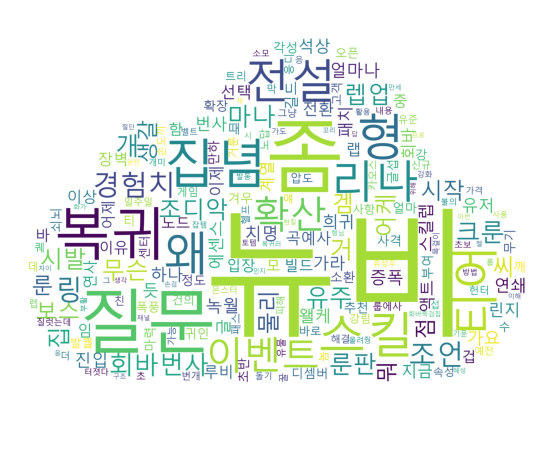

In [465]:
plt.figure(figsize=(10,8))
plt.imshow(gen)
plt.axis('off')